## Feature Scaling and Normalization - Lab

## Introduction
In this lab, you'll practice your feature scaling and normalization skills!

## Objectives
You will be able to:
* Implement min-max scaling, mean-normalization, log normalization, and unit vector normalization in Python
* Identify appropriate normalization and scaling techniques for a given dataset

## Back to our Boston Housing data

Let's import our Boston Housing data. Remember we categorized two variables (`'RAD'` and `'TAX'`) and deleted the `'NOX'` (nitride oxide concentration) variable because it was highly correlated with two other features.

In [28]:
import pandas as pd

from sklearn.datasets import load_boston
boston = load_boston()

boston_features = pd.DataFrame(boston.data, columns = boston.feature_names)

# First, create bins for RAD based on the values observed. 5 values will result in 4 bins
bins = [0, 3, 4 , 5, 24]
bins_rad = pd.cut(boston_features['RAD'], bins)
bins_rad = bins_rad.cat.as_unordered()

# First, create bins for TAX based on the values observed. 6 values will result in 5 bins
bins = [0, 250, 300, 360, 460, 712]
bins_tax = pd.cut(boston_features['TAX'], bins)
bins_tax = bins_tax.cat.as_unordered()

tax_dummy = pd.get_dummies(bins_tax, prefix='TAX', drop_first=True)
rad_dummy = pd.get_dummies(bins_rad, prefix='RAD', drop_first=True)
boston_features = boston_features.drop(['RAD', 'TAX','CHAS'], axis=1)
boston_features = pd.concat([boston_features, rad_dummy, tax_dummy], axis=1)
boston_features = boston_features.drop('NOX', axis=1)

In [29]:
boston_features

,CRIM,ZN,INDUS,RM,AGE,DIS,PTRATIO,B,LSTAT,"RAD_(3, 4]","RAD_(4, 5]","RAD_(5, 24]","TAX_(250, 300]","TAX_(300, 360]","TAX_(360, 460]","TAX_(460, 712]"
0,0.00632,18.0,2.31,6.575,65.2,4.0900,15.3,396.90,4.98,0,0,0,1,0,0,0
1,0.02731,0.0,7.07,6.421,78.9,4.9671,17.8,396.90,9.14,0,0,0,0,0,0,0
2,0.02729,0.0,7.07,7.185,61.1,4.9671,17.8,392.83,4.03,0,0,0,0,0,0,0
3,0.03237,0.0,2.18,6.998,45.8,6.0622,18.7,394.63,2.94,0,0,0,0,0,0,0
4,0.06905,0.0,2.18,7.147,54.2,6.0622,18.7,396.90,5.33,0,0,0,0,0,0,0
5,0.02985,0.0,2.18,6.430,58.7,6.0622,18.7,394.12,5.21,0,0,0,0,0,0,0
6,0.08829,12.5,7.87,6.012,66.6,5.5605,15.2,395.60,12.43,0,1,0,0,1,0,0
7,0.14455,12.5,7.87,6.172,96.1,5.9505,15.2,396.90,19.15,0,1,0,0,1,0,0
8,0.21124,12.5,7.87,5.631,100.0,6.0821,15.2,386.63,29.93,0,1,0,0,1,0,0
9,0.17004,12.5,7.87,6.004,85.9,6.5921,15.2,386.71,17.10,0,1,0,0,1,0,0


## Look at the histograms for the continuous variables

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb1e84ca1d0>,
      dtype=object)

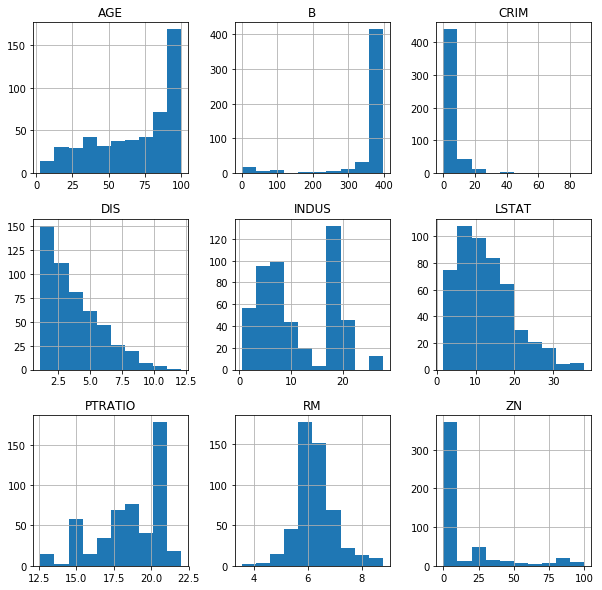

In [30]:
# Your code here
boston_features[['CRIM','ZN','INDUS','RM','AGE','DIS','PTRATIO','B','LSTAT']].hist(figsize=[10,10])

## Perform log transformations for the variables where it makes sense

Analyze the results in terms of how they improved the normality performance. What is the problem with the `'ZN'` feature?  

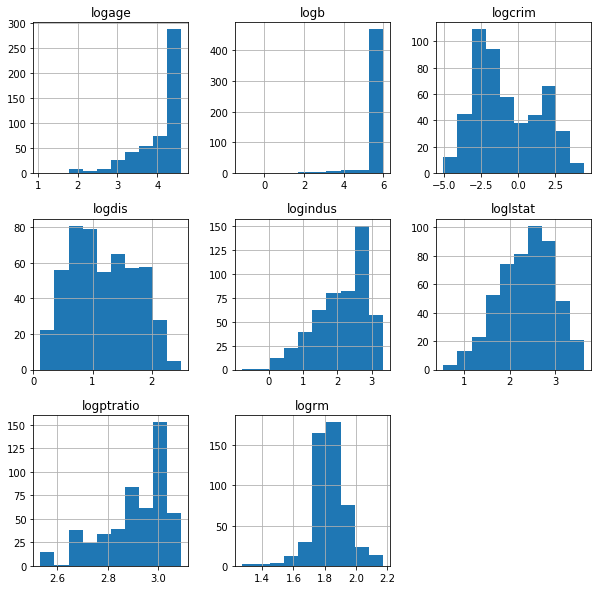

In [37]:
# Your code here
import numpy as np
data_log = pd.DataFrame([])
data_log['logage'] = np.log(boston_features['AGE'])
data_log['logb'] = np.log(boston_features['B'])
data_log['logcrim'] = np.log(boston_features['CRIM'])
data_log['logdis'] = np.log(boston_features['DIS'])
data_log['logindus'] = np.log(boston_features['INDUS'])
data_log['loglstat'] = np.log(boston_features['LSTAT'])
data_log['logptratio'] = np.log(boston_features['PTRATIO'])
data_log['logrm'] = np.log(boston_features['RM'])




data_log.hist(figsize  = [10, 10]);

In [32]:
data_log['ZN'] = np.log(boston_features['ZN'])
data_log['ZN'].describe()

/opt/conda/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in log
  """Entry point for launching an IPython kernel.


count    506.000000
mean           -inf
std             NaN
min            -inf
25%            -inf
50%            -inf
75%        2.525729
max        4.605170
Name: ZN, dtype: float64

`'ZN'` has a lot of zeros (more than 50%!). Remember that this variable denoted: "proportion of residential land zoned for lots over 25,000 sq.ft.". It might have made sense to categorize this variable to "over 25,000 feet or not (binary variable 1/0). Now you have a zero-inflated variable which is cumbersome to work with.

In [33]:
# Your code here

## Try different types of transformations on the continuous variables

Store your final features in a DataFrame `features_final`: 

In [34]:
#age and b do not improve on skewness when we performed log transformation
#


In [40]:
# Your code here
age = boston_features['AGE']
b = boston_features['B']
rm = boston_features['RM']
logcrim = data_log['logcrim']
logdis = data_log['logdis']  
logindus = data_log['logindus'] 
loglstat = data_log['loglstat']
logptratio = data_log['logptratio']

In [42]:
features_final = pd.DataFrame([])
features_final['CRIM'] = (logcrim-min(logcrim))/(max(logcrim)-min(logcrim))
features_final['AGE'] = (age - min(age)) / (max(age) - min(age))
features_final['B'] =  (b - min(b)) / (max(b) - min(b))
features_final['RM'] = (rm - min(rm)) / (max(rm) - min(rm))
features_final['DIS'] = (logdis-np.mean(logdis))/np.sqrt(np.var(logdis))
features_final['INDUS'] = (logindus-np.mean(logindus))/np.sqrt(np.var(logindus))
features_final['LSTAT'] = (loglstat - np.mean(loglstat)) / (max(loglstat) - min(loglstat))
features_final['PTRATIO'] = (logptratio - np.mean(logptratio)) / (max(logptratio) - min(logptratio))


features_final

,CRIM,AGE,B,RM,DIS,INDUS,LSTAT,PTRATIO
0,0.000000,0.641607,1.000000,0.577505,0.409104,-1.704344,-0.247852,-0.323068
1,0.153211,0.782698,1.000000,0.547998,0.769562,-0.263239,-0.051253,-0.051521
2,0.153134,0.599382,0.989737,0.694386,0.769562,-0.263239,-0.316381,-0.051521
3,0.171005,0.441813,0.994276,0.658555,1.139194,-1.778965,-0.418482,0.036979
4,0.250315,0.528321,1.000000,0.687105,1.139194,-1.778965,-0.225862,0.036979
5,0.162521,0.574665,0.992990,0.549722,1.139194,-1.778965,-0.233234,0.036979
6,0.276046,0.656025,0.996722,0.469630,0.978929,-0.125137,0.048289,-0.334834
7,0.327656,0.959835,1.000000,0.500287,1.104691,-0.125137,0.188216,-0.334834
8,0.367371,1.000000,0.974104,0.396628,1.145274,-0.125137,0.332795,-0.334834
9,0.344658,0.854789,0.974305,0.468097,1.294662,-0.125137,0.151558,-0.334834


## Summary
Great! You've now transformed your final data using feature scaling and normalization, and stored them in the `features_final` DataFrame.